<a href="https://colab.research.google.com/github/kahramankaya/VeriBilimiKucukProje/blob/main/Twitter_Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#let's start by importing the necessary python libraries
!pip install missingno as msno
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import date, timedelta
!pip install pingouin
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=bfb9bbc38957077ed005f0d1bf266615c67aee2f559e2ab27618610d5dab4d75
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [2]:
#now let's start to read the dataset
data=pd.read_csv("/content/TWTR.csv")

In [3]:
data1=data.copy()
print(data1.head(20))
print(data1.tail(20))

          Date       Open       High        Low      Close  Adj Close  \
0   2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1   2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2   2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3   2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4   2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   
5   2013-11-14  42.340000  45.669998  42.240002  44.689999  44.689999   
6   2013-11-15  45.250000  45.270000  43.430000  43.980000  43.980000   
7   2013-11-18  43.500000  43.950001  40.849998  41.139999  41.139999   
8   2013-11-19  41.389999  41.900002  40.000000  41.750000  41.750000   
9   2013-11-20  41.400002  41.750000  40.509998  41.049999  41.049999   
10  2013-11-21  41.250000  42.490002  40.369999  42.060001  42.060001   
11  2013-11-22  41.810001  42.279999  40.970001  41.000000  41.000000   
12  2013-11-25  41.080002  41.139999  38.799999  39

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


In [5]:
print(data1.describe().T)

            count          mean           std     min           25%  \
Open       2259.0  3.602029e+01  1.411846e+01  13.950  2.555000e+01   
High       2259.0  3.669988e+01  1.437206e+01  14.220  2.621500e+01   
Low        2259.0  3.533946e+01  1.382872e+01  13.725  2.491250e+01   
Close      2259.0  3.600363e+01  1.408999e+01  14.010  2.541000e+01   
Adj Close  2259.0  3.600363e+01  1.408999e+01  14.010  2.541000e+01   
Volume     2259.0  2.175186e+07  1.909988e+07   0.000  1.233530e+07   

                    50%           75%           max  
Open       3.542000e+01  4.420500e+01  7.836000e+01  
High       3.610000e+01  4.501500e+01  8.075000e+01  
Low        3.482000e+01  4.332750e+01  7.605000e+01  
Close      3.549000e+01  4.413500e+01  7.763000e+01  
Adj Close  3.549000e+01  4.413500e+01  7.763000e+01  
Volume     1.691305e+07  2.428082e+07  2.692131e+08  


In [6]:
print(data1.shape)

(2264, 7)


Axes(0.125,0.125;0.775x0.755)


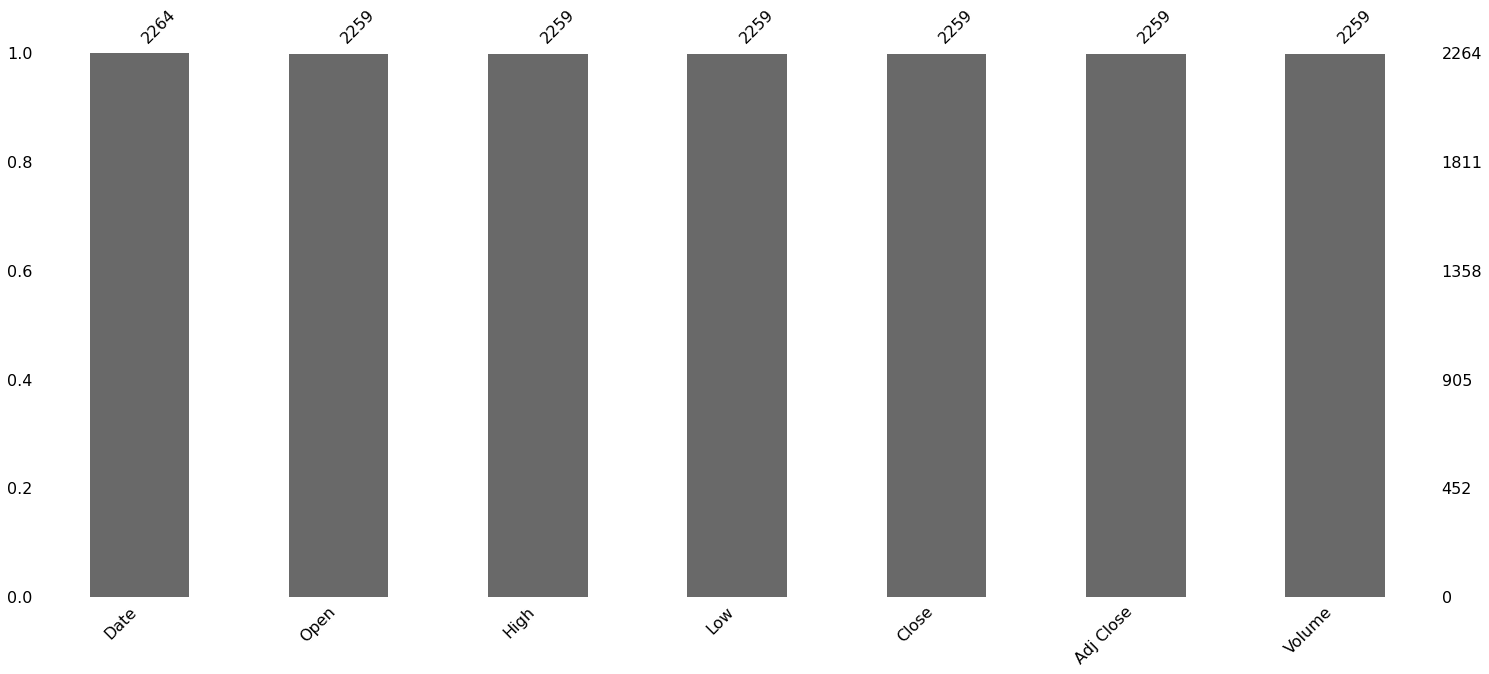

In [7]:
# our dataset contains some null values.
print(msno.bar(data1))

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


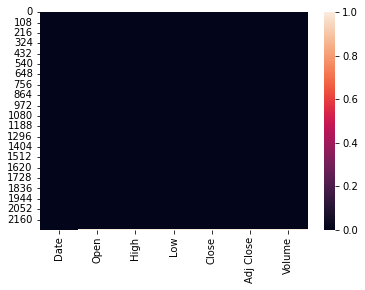

In [8]:
#we remove these null values by the "dropna" parameter and I will show you result with heatmap.
data1.dropna(inplace=True)
print(data1.isnull().sum())
sns.heatmap(data.isnull())
plt.show()

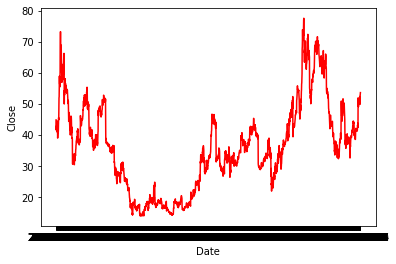

In [9]:
data["Date"] = pd.to_datetime(data["Date"],format = '%Y-%m-%d')
data['Year'] = data['Date'].dt.year
sns.lineplot(data=data1,x="Date",y="Close",color="red")
plt.show()

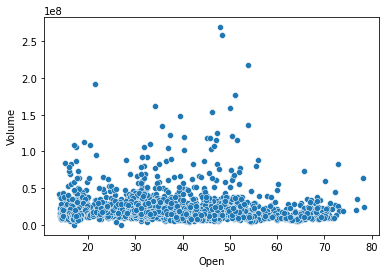

In [10]:
sns.scatterplot(data=data1,y="Volume",x="Open")
plt.show()

In [11]:
import numpy as np
np.corrcoef(x=data1["Open"],y=data1["Volume"])

array([[ 1.        , -0.01571776],
       [-0.01571776,  1.        ]])

In [12]:
#1-ilk adım gozlemler sureklı
from scipy import stats
#2-normallık testı.
stats.shapiro(data1["Volume"])
#h0 red yani normal dagılım yok. bu yuzden sonrakı adımlarda non-parametrık testlere gecılır.

ShapiroResult(statistic=0.5801742076873779, pvalue=0.0)

In [13]:
#h0: open ve volum arasında ilişki anlamlı degıldır
#h1: ilişki anlamlıdır.
pg.corr(x=data1["Open"],y=data1["Volume"],method="spearman")
#p-value degerı 0.05 ten kucuk oldugu ıcın h0 red edilir. yanı ılışki anlamlıdır yanı şansa bagı olmamıs.

,n,r,CI95%,p-val,power
spearman,2259,-0.12098,"[-0.16, -0.08]",8.017922e-09,0.999932


In [14]:
pg.pairwise_corr(data=data1,method="spearman")
#p-unc degerınden hangı degıskenler arasında degısıklık olup olmadıgı ogrenılebılır.

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Open,High,spearman,two-sided,2259,0.998645,"[1.0, 1.0]",0.000000e+00,1.000000
1,Open,Low,spearman,two-sided,2259,0.998514,"[1.0, 1.0]",0.000000e+00,1.000000
2,Open,Close,spearman,two-sided,2259,0.997211,"[1.0, 1.0]",0.000000e+00,1.000000
3,Open,Adj Close,spearman,two-sided,2259,0.997211,"[1.0, 1.0]",0.000000e+00,1.000000
4,Open,Volume,spearman,two-sided,2259,-0.120980,"[-0.16, -0.08]",8.017922e-09,0.999932
5,High,Low,spearman,two-sided,2259,0.998177,"[1.0, 1.0]",0.000000e+00,1.000000
6,High,Close,spearman,two-sided,2259,0.998661,"[1.0, 1.0]",0.000000e+00,1.000000
7,High,Adj Close,spearman,two-sided,2259,0.998661,"[1.0, 1.0]",0.000000e+00,1.000000
8,High,Volume,spearman,two-sided,2259,-0.103672,"[-0.14, -0.06]",7.892737e-07,0.998573
9,Low,Close,spearman,two-sided,2259,0.998820,"[1.0, 1.0]",0.000000e+00,1.000000
